In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

In [9]:
msh = pd.read_csv('./dataset/mushrooms.csv')

display(msh.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
display(msh.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
ml = preprocessing.LabelEncoder()
for columns in msh.columns:
    msh[columns] = ml.fit_transform(msh[columns])

msh.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [34]:
x = msh.iloc[:, 1:23].values
y = msh.iloc[:, 0].values
y = y.reshape(len(y), 1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)

In [36]:
dt = DecisionTreeClassifier(max_depth=8, random_state=5)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=5)

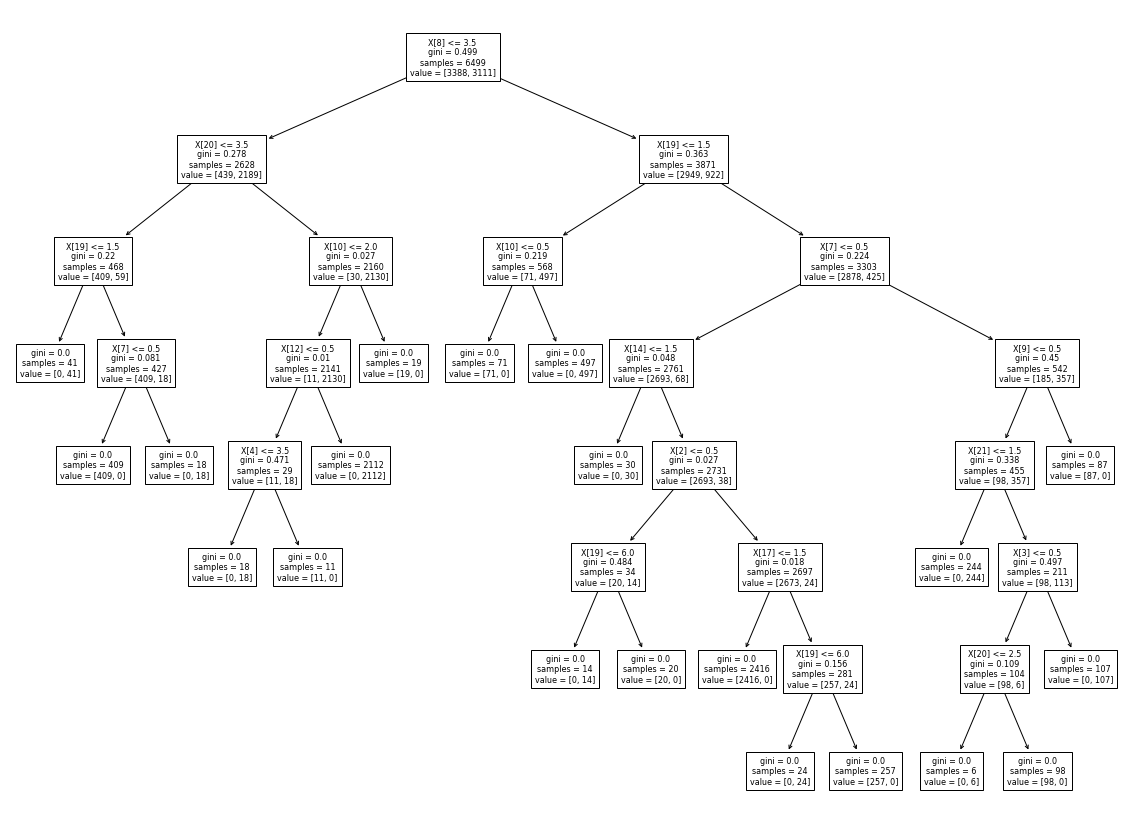

In [37]:
plt.figure(figsize=(20, 15))
tree.plot_tree(dt.fit(x_train, y_train), fontsize=8)
plt.show()

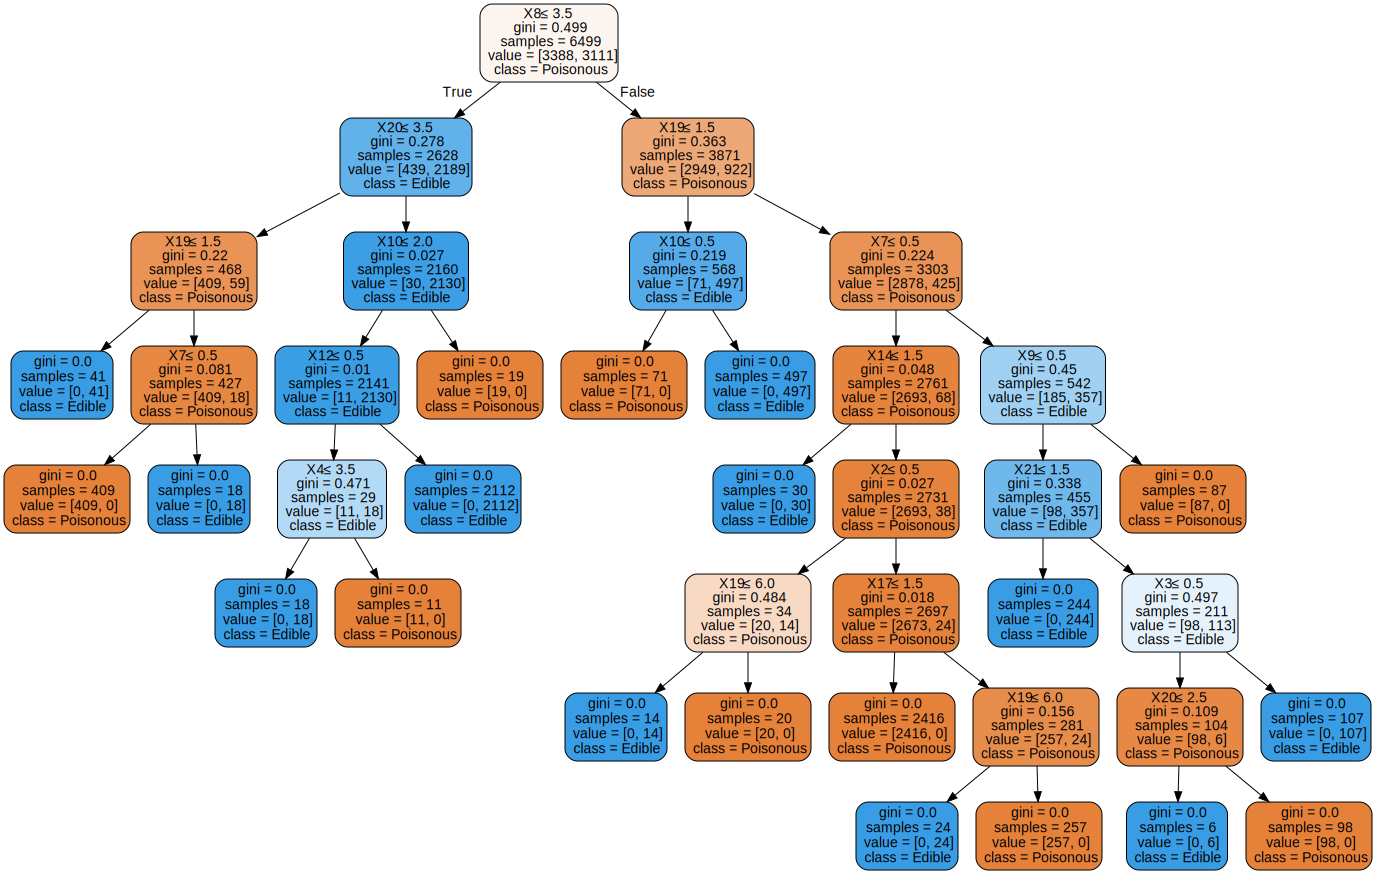

In [38]:
import graphviz

dot_data = tree.export_graphviz(
    dt.fit(x_train, y_train),
    out_file=None,
    class_names=['Poisonous', 'Edible'],
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [45]:
y_pred = dt.predict(x_test)
print(y_pred[0:5])

[0 1 1 1 0]


In [46]:
def inverse_label(e):
    return 'Poison' if e == 1 else 'Edible'


res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

['Edible' 'Poison' 'Poison' 'Poison' 'Edible']


In [47]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 1.00
